#### [ 지도학습 - 회귀 ]
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예 : 거리, 시간, 무게, 집가격 등등 ...

- 주제 : 공부시간에 따른 점수 예측
- 방법 : Linear Model 계열의 LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [13]:
## ==========================================
## [1-1] 모듈 로딩
## ==========================================
import pandas as pd
import numpy as np

## 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 관련
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Cow 활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)



In [14]:
## =======================================
## [1-2] 데이터 준비 및 확인
## =======================================
## 데이터 준비
hour  = [1,  2,  3,  5,  7,  8,  10]
score = [15, 32, 45, 55, 60, 73, 91]

## 공부시간과 성적 데이터 셋
dataDF = pd.DataFrame({'Hour' : hour, 'Score' : score})
dataDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hour    7 non-null      int64
 1   Score   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


0.9761726878604323


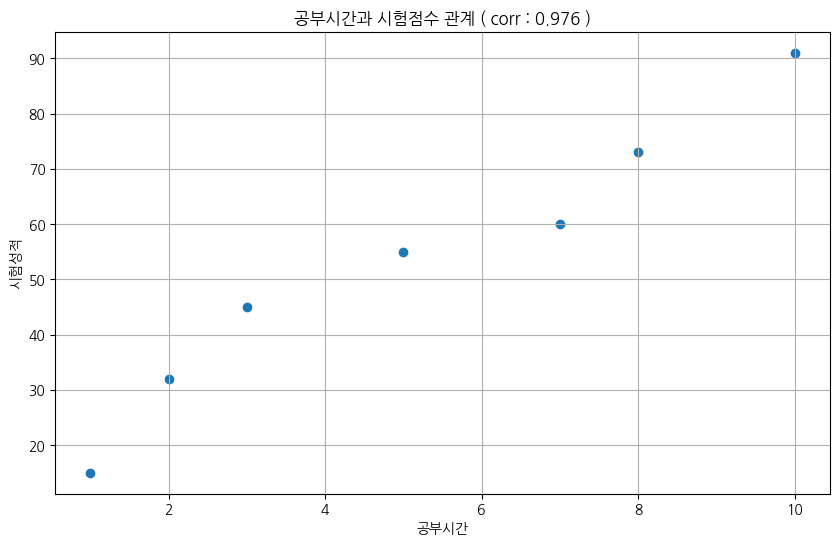

In [17]:
## ========================================================
## 공부시간과 성적 관계 시각화 => Linear Model로써
##                            피쳐와 타겟 선형 관계성
## ========================================================
## => 상관계수 계산 : [기] person => 피쳐와 타겟의 직선의 선형성
corr_ = dataDF.corr(numeric_only=True)
corr_value = corr_['Hour'].Score
print(corr_value)

## => 시각화
plt.figure(figsize=(10,6))
plt.scatter(dataDF.Hour, dataDF.Score)
plt.title(f"공부시간과 시험점수 관계 ( corr : {corr_value:.3f} )")
plt.xlabel('공부시간')
plt.ylabel('시험성적')
plt.grid()
plt.show()

[2] 피쳐와 타겟/학습용과 테스트 분리 <hr>

In [67]:
featureDF = dataDF[dataDF.columns[0:1]] ## 공부시간
# print(featureDF.shape)
targetSR = dataDF[dataDF.columns[-1]]     ## 성적
# print(targetSR.shape)

x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=10,
                                                    # stratify=targetSR ## 분류에만 사용, 회귀는 X
                                                    )

print(f'[TRAIN] x_train:{x_train.shape},  y_train:{y_train.shape}')
print(f'[TEST] x_test:{x_test.shape},  y_test:{y_test.shape}')

[TRAIN] x_train:(5, 1),  y_train:(5,)
[TEST] x_test:(2, 1),  y_test:(2,)


[3] 학습 진행 <hr>

In [68]:
## 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
## 학습진행 => 학습용 데이터셋만 사용 ===> 시험성적=공부시간*w1 + w0
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_ => 피쳐에 곱해지는 가중치 w, 결과 미세조정 bias
print('가중치 coef_          :', lrModel.coef_)
print('절  편 intercept_     :', lrModel.intercept_)
print('n_feature_names_in   :', lrModel.feature_names_in_)
print('n_features_in_       :', lrModel.n_features_in_)

print('선형식 즉, 모델 : ', f'공부시간 X ({lrModel.coef_[0]:.2f}) + ({lrModel.intercept_:.2f})')


가중치 coef_          : [7.446237]
절  편 intercept_     : 12.747311827956985
n_feature_names_in   : ['Hour']
n_features_in_       : 1
선형식 즉, 모델 :  공부시간 X (7.45) + (12.75)


[4] 성능평가 <hr>

In [71]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
train_score = lrModel.score(x_train, y_train)
test_score  = lrModel.score(x_test, y_test)

print(f'train_score : {train_score}')
print(f'test_score  : {test_score}')

train_score : 0.955795888267711
test_score  : 0.8935221976774963


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운 피쳐) ==> 

In [72]:
newDF = pd.DataFrame([[2],[10]], columns=dataDF.columns[0:1])
display(newDF)

pre_score = lrModel.predict(newDF)
print(pre_score)


,Hour
0,2
1,10


[27.639785 87.209677]


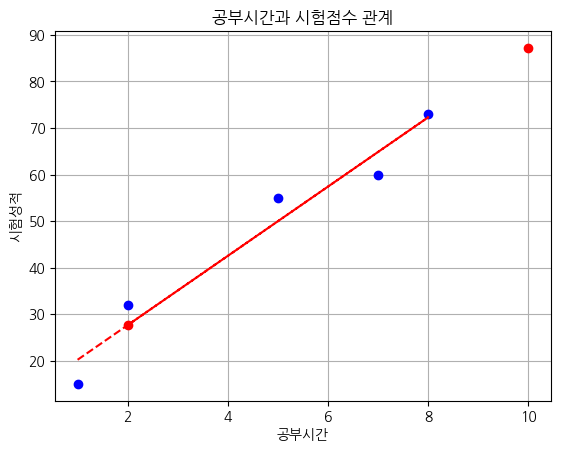

In [79]:
## => 시각화
plt.plot(x_train.Hour, y_train, 'bo')

##새로운 데이터
plt.plot(newDF.Hour, pre_score, 'ro')

## 회귀선 그리기 (선형식 사용)
x = x_train.Hour
y = lrModel.coef_ * x + lrModel.intercept_
plt.plot(x,y, 'r--', label= f'{lrModel.coef_ }* x + {lrModel.intercept_}')

plt.title(f"공부시간과 시험점수 관계")
plt.xlabel('공부시간')
plt.ylabel('시험성적')
plt.grid()
plt.show()